<a href="https://colab.research.google.com/github/sivasaiyadav8143/Machine-Learning-with-Python/blob/master/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def model_logistic(x,w): # Model
    y = w[1]*x + w[0] # Linear predictor
    y = 1 / (1 + np.exp(-y)) # logistic
    return y

def loss_CE(y,t):    
    N = np.shape(y)[0] # number of samples    
    loss = - np.sum( t * np.log(y) + (1-t) * np.log(1-y) ) / N # Cross entropy
    return loss

def grad_CE_logistic(x,y,t):
    x1 = np.vstack((np.ones_like(x), x))
    N = np.shape(y)[0] # number of samples        
    grad = (1.0/len(x)) * np.dot( x1 , y - t ) / N # Gradient of cross entropy
    return grad

0.4108201911851403


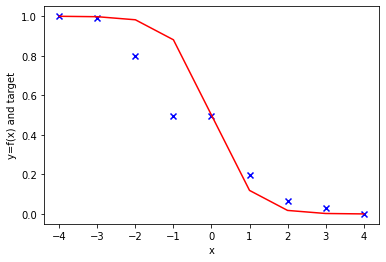

In [2]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]) # Inputs
w_ideal = np.array([0, -2.0]) # Actual bias and weight
t = w_ideal[1]*x + w_ideal[0] + 2*np.random.randn(np.size(x)) # Adding some noise to desired output
t = 1 / (1 + np.exp(-t))

# TRY THE IDEAL WEIGHTS AND PLOT DATA
w = w_ideal # Some estimated weights.
y = model_logistic(x,w) # Model

# Plot data
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")


# CHECK THE LOSS WITH IDEAL WEIGHTS. IT SHOULD BE LOW, IF THE NOISE IS LOW.
loss = loss_CE(y,t)
print(loss)

12.508082345700604


Text(0, 0.5, 'y=f(x) and target')

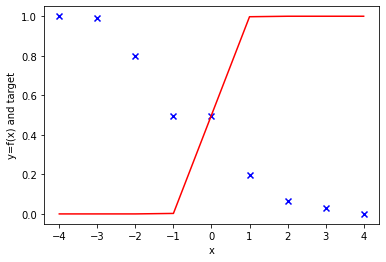

In [3]:
# INITIALIZE SOME WEIGHTS AND TRAINING HYPERPARAMETERS

w = np.array([0.0, 6.0]) # RANDOM INITIALIZATION OF WEIGHTS
learning_rate = 3 # HOW FAST WILL THE LEARNING CONVERGE
iterations = 0 # SET ITERATION COUNTER

# CHECK PLOT AND LOSS
y = model_logistic(x,w) # Model 

loss = loss_CE(y,t)
print(loss)

plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")

[-0.01584872  5.30959993]


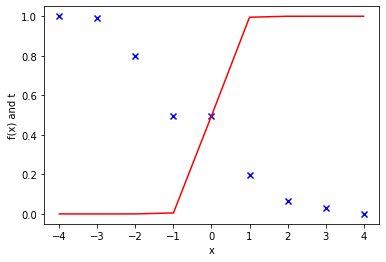

In [4]:
# PERFORM ONE ITERATION OF GRADIENT DESCENT USING MSE LOSS

iterations += 1 # Update iteration number

grad = grad_CE_logistic(x,y,t) # Compute gradient
delta_w = -learning_rate * grad # Update weight and bias
w += delta_w # Update weight and bias

# Plot data
y = model_logistic(x,w) # Compute current output
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("f(x) and t")

print(w)

[2, array([-0.03154491,  4.6193839 ]), 9.647953120021057]
[3, array([-0.04707875,  3.92953789]), 8.220255543472126]
[4, array([-0.06242432,  3.24044194]), 6.796399658489552]
[5, array([-0.07752015,  2.55289432]), 5.380544913198805]
[6, array([-0.09222905,  1.86868477]), 3.982401011099737]
[7, array([-0.10624855,  1.1924765 ]), 2.6294764147139316]
[8, array([-0.11882631,  0.54030311]), 1.4232277530676545]
[9, array([-0.12783619, -0.01775754]), 0.6723134751511654]
[10, array([-0.13305194, -0.32814921]), 0.45887654711753256]
[11, array([-0.13946344, -0.48343539]), 0.4001027598669172]
[12, array([-0.14679658, -0.58260698]), 0.3746998956747885]
[13, array([-0.15456708, -0.65406193]), 0.36101923564936633]
[14, array([-0.16252915, -0.7089754 ]), 0.3527070890413243]
[15, array([-0.17054881, -0.75288646]), 0.34725513651270956]
[16, array([-0.17854668, -0.78895497]), 0.3434829395378671]
[17, array([-0.18647281, -0.81916   ]), 0.3407667320452047]
[18, array([-0.19429442, -0.84482626]), 0.33874867

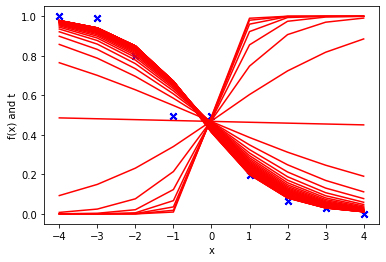

In [5]:
# Perform gradient descent in a loop

max_iter = 100 # Maximum iterations allowed
min_abs_change = 0.005 # Minimum change in weights allowed

while True:
    
    iterations += 1 # Update iteration number

    grad = grad_CE_logistic(x,y,t) # Compute gradient
    delta_w = -learning_rate * grad # Update weight and bias

    # Stopping Condition
    if np.sum(abs(delta_w)) < min_abs_change:
        break
    if iterations > max_iter:
        break

    w += delta_w # update weights

    # Plot data
    y = model_logistic(x,w) # Compute current output
    plt.scatter(x, t, c="b", marker='x')
    plt.plot(x, y, c="r")
    plt.xlabel("x")
    plt.ylabel("f(x) and t")

    print([iterations,w,loss_CE(y,t)])